# Creating the subdomain decomposition for the Poisson equation

We consider the Poisson equation, with the a rectangle $[0.25, 0.75] \times [0.25, 0.75]$ inside the rectangle $[0, 1] \times [0, 1]$.

In [1]:
import jax.numpy as np

import plotutils
from region_utils.region import Domain, Subdomain
from region_utils.shapes import ConvexPolygon
from utils import data_path

We begin by choosing the relevant verticies required for our decomposition, in this case just the corners of the rectangles. It is only the outer region which has boundary points, while the boundary between the subdomains are designated as interfaces.

In [2]:
total_vertices = np.asarray(
    [
        [0, 0],
        [0, 1],
        [1, 1],
        [1, 0],
        [0.25, 0.25],
        [0.25, 0.75],
        [0.75, 0.75],
        [0.75, 0.25],
    ]
)

region_idxs = np.asarray([[0, 1, 2, 3], [4, 5, 6, 7]])
boundary_idxs = [[0, 1, 2, 3], []]

In [3]:
outer_rectangle = ConvexPolygon(
    total_vertices[region_idxs[0]],
    boundary_idxs[0],
)
inner_rectangle = ConvexPolygon(
    total_vertices[region_idxs[1]],
    boundary_idxs[1],
)

subdomain1 = Subdomain([outer_rectangle], subtraction=[inner_rectangle])
subdomain2 = Subdomain([inner_rectangle])

domain = Domain([subdomain1, subdomain2])

We place 400 points for the interior, 40 for the boundary, and 40 for the interfaces.

In [4]:
domain.create_interior(900, [0, 0], [1, 1])
domain.create_boundary(120)

idx = [4, 5, 6, 7, 4]
for i in range(4):
    domain.create_interface(
        20,
        (0, 1),
        (total_vertices[idx[i]], total_vertices[idx[i + 1]]),
    )

(656, 2)
(244, 2)


As a sanity check, we verify that all of the points are where we expect them to be.

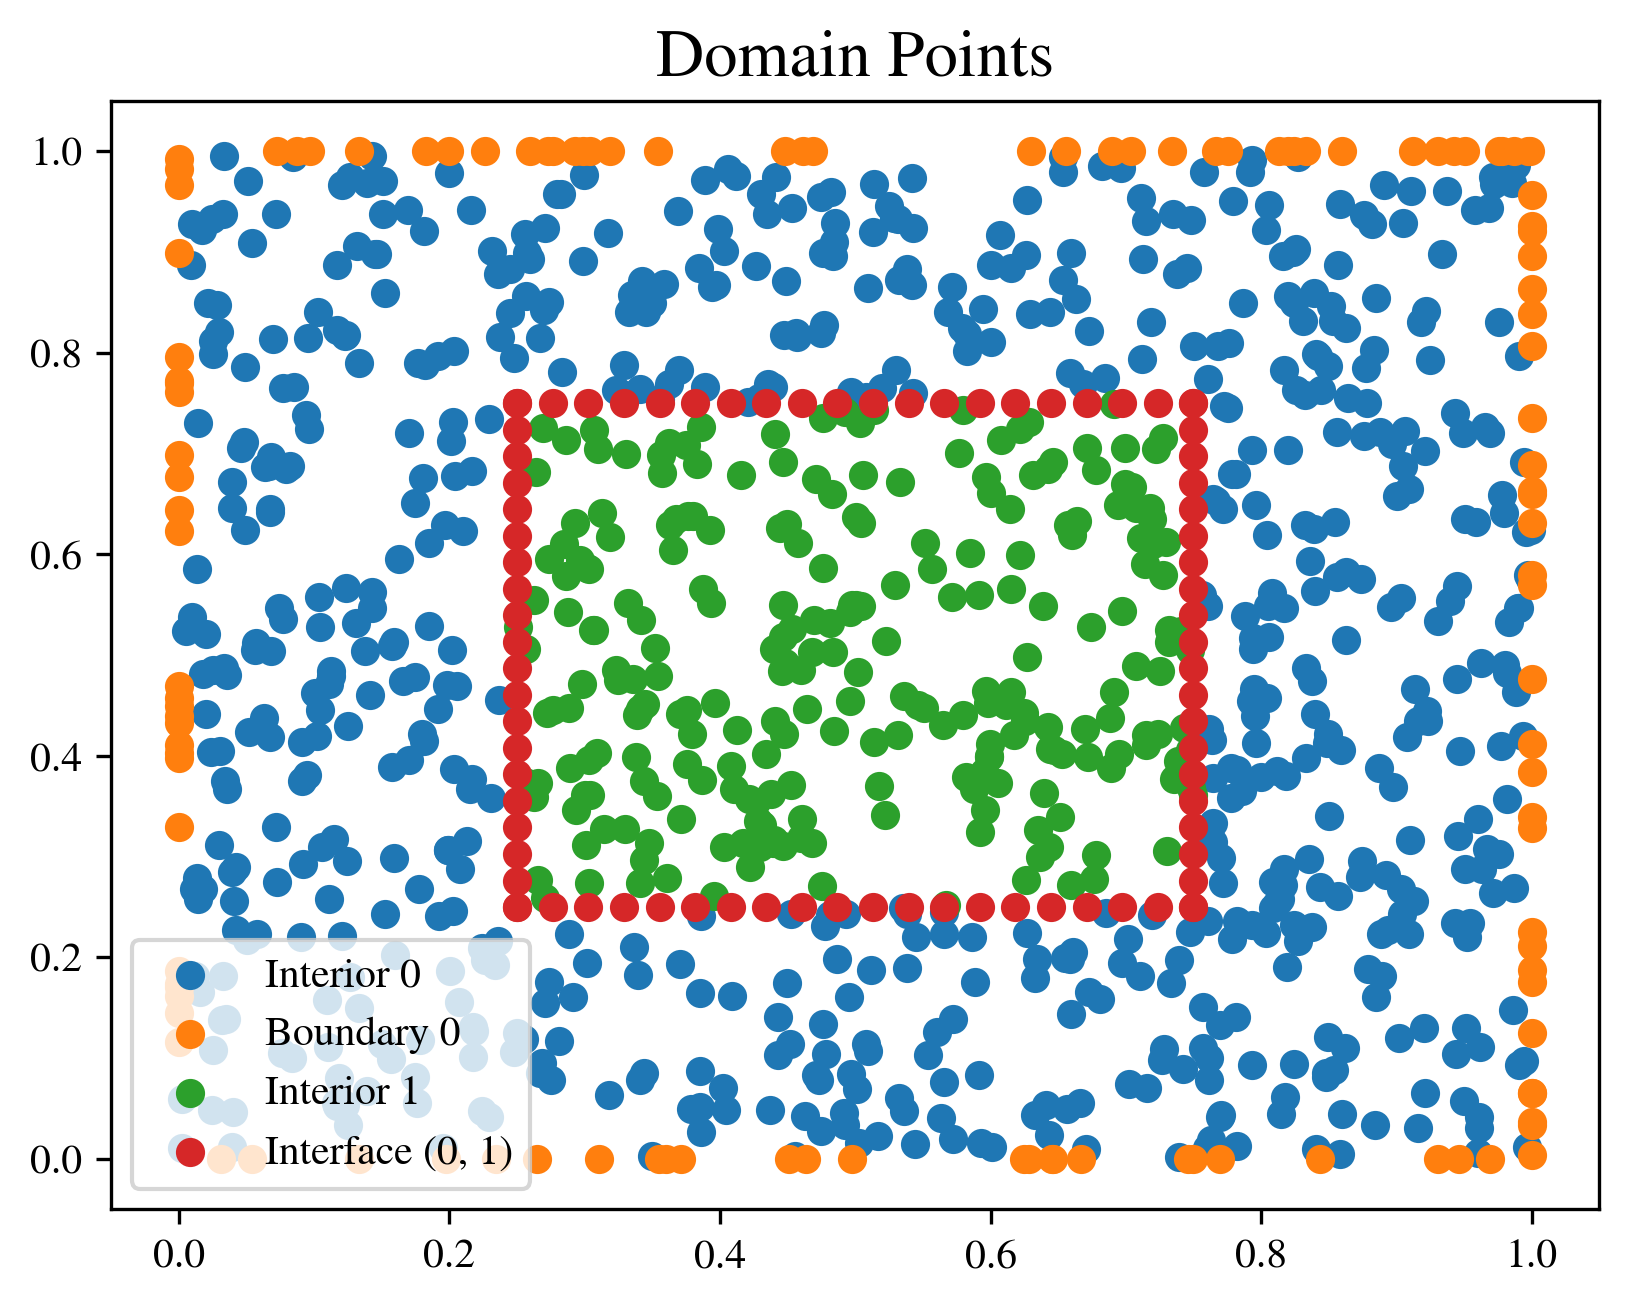

In [5]:
domain.plot()

In [6]:
domain.write_to_file(data_path / "poisson_smooth_train.json")

We use a $1000 \times 1000$ grid for the testing points, uniformly spaced throughout.

In [7]:
domain.create_testing_data(100, [0, 0], [1, 1])
domain.write_to_file(data_path / "poisson_smooth_test.json", False)

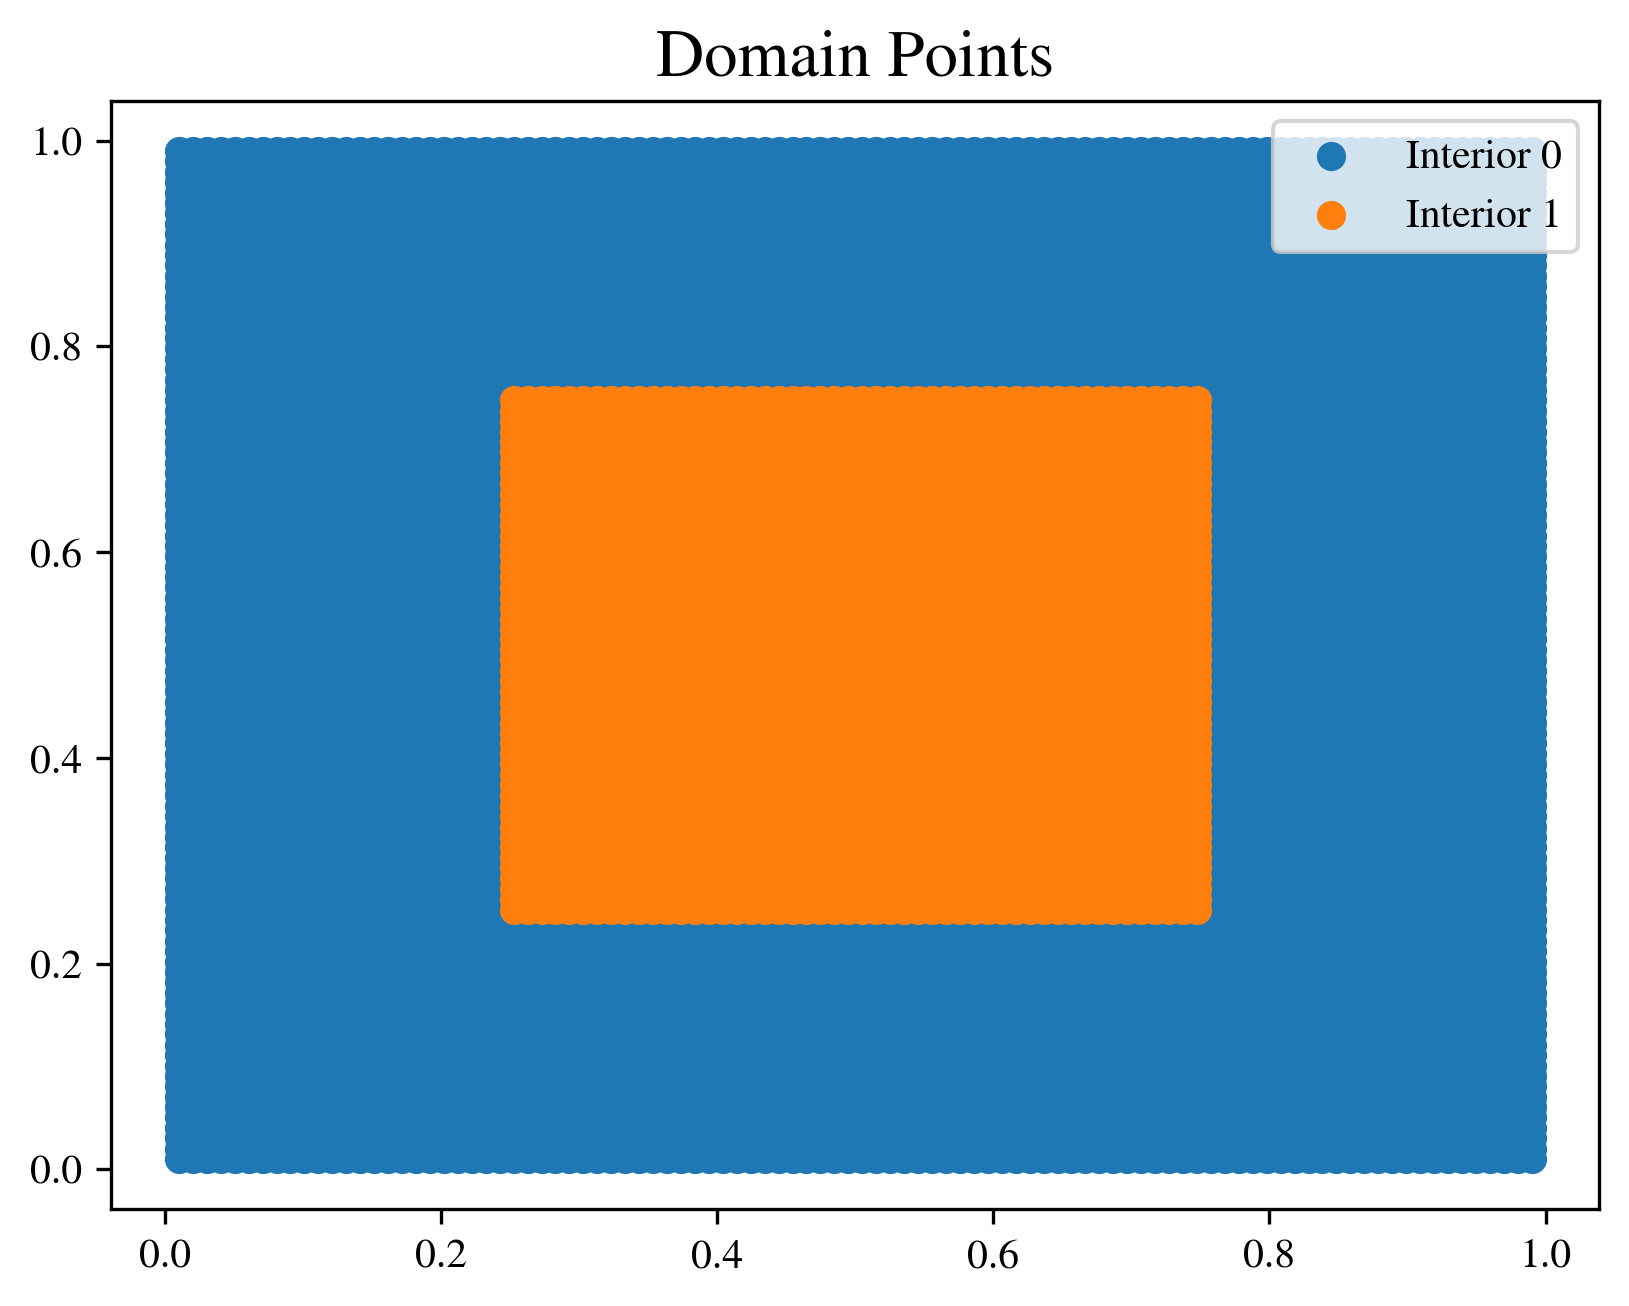

In [8]:
domain.plot(False)